# Исследовательский проект по продажам компьютерных игр

***Описание проекта***<br>
Интернет-магазин «Стримчик» продаёт компьютерные игры по всему миру. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).<br>
<br>
`Цель проекта` - определение параметров, влияющих на успешность компьютерных игр. В дальнейшем это поможет заранее выявить потенциально популярный продукт и сформировать для него рекламную компанию.<br><br>
`Выгрузка данных` - архивные данные из открытых источников о продажах игр до 2016 года. Данные за последний год указаны не в полном размере, так как мы "образно" находимся в декабре 2016 года.<br>
<br>
Ниже представлено `описание данных архива`:<br>
 - Name — название игры<br>
 - Platform — платформа<br>
 - Year_of_Release — год выпуска<br>
 - Genre — жанр игры<br>
 - NA_sales — продажи в Северной Америке (миллионы проданных копий)<br>
 - EU_sales — продажи в Европе (миллионы проданных копий)<br>
 - JP_sales — продажи в Японии (миллионы проданных копий)<br>
 - Other_sales — продажи в других странах (миллионы проданных копий)<br>
 - Critic_Score — оценка критиков (максимум 100)<br>
 - User_Score — оценка пользователей (максимум 10)<br>
 - Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.<br>

Ниже представлено `описание рейтинга от организации ESRB`:<br>
- «EC» («Early childhood») — «Для детей младшего возраста» <br>
- «E» («Everyone») — «Для всех» <br>
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше» <br>
- «T» («Teen») — «Подросткам» <br>
- «M» («Mature») — «Для взрослых» <br>
- «AO» («Adults Only 18+») — «Только для взрослых» <br>
- «RP» («Rating Pending») — «Рейтинг ожидается» <br>
- «K-A» («Kids to Adults») - «Для детей и взрослых» <br>

**План работы над проектом**
<br>
1. Изучение предоставленных данных. <br>
2. Подготовка данных к последующему анализу(разбор пропусков, дубликатов, аномальных значений и т.д.).<br> 
3. Проведение исследовательского анализа данных.<br> 
4. Составление портрета пользователя каждого региона<br> 
5. Проверка сформированных гипотез.<br> 
6. Общий вывод и рекомендации.<br> 

# 1. Изучение предоставленных данных.

**Импортируем** необходимые для анализа **библиотеки**. <br>
**Прочитаем csv-файл** с данными из архива и сохраним в переменную `game_sales_archive`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from scipy import stats as st

import warnings
warnings.filterwarnings('ignore')

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
game_sales_archive = pd.read_csv('/datasets/games.csv')

In [4]:
# выведем первые 20 строк датафрейма
game_sales_archive.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Посмотрим **основную информацию** о датафрейме с помощью метода `info()` и `describe()`.

In [5]:
game_sales_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
game_sales_archive.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Построим **гистограммы** для всех столбцов `game_sales_archive`.

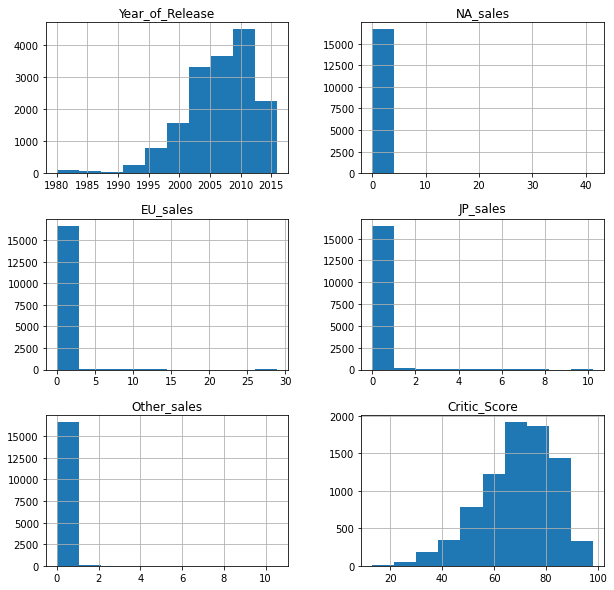

In [7]:
game_sales_archive.hist(figsize=(10, 10));

**Посчитаем пропуски** для каждой колонки датафрейма.

In [8]:
game_sales_archive.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

И какой **процент** эти пропуски составляют **от общего количества** строк.

In [9]:
game_sales_archive.isna().mean().sort_values(ascending=True)*100

Platform            0.000000
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Name                0.011965
Genre               0.011965
Year_of_Release     1.609333
User_Score         40.089740
Rating             40.478612
Critic_Score       51.319174
dtype: float64

Проверим нет ли **явных дубликатов** среди объявлений.

In [10]:
game_sales_archive.duplicated().sum()

0

Вывод:<br>
**Необходимо исправить названия** всех столбцов. т.к. они записаны не в стиле `snake_case`. <br>
Столбец `Year_of_Release` привести **к правильному типу** данных.<br>
**Все объявления в данных уникальны**, но больше половины колонок **имеют пропуски**. В трёх столбцах пропущенные значения занимают больше половины данных столбца. Потребуется **уделить внимание выяснению природы их появления**, решить заменять их, удалять или оставить для осуществления более точного анализа данных.

# 2. Подготовка данных.

Для начала приведем названия столбцов к виду `snake_case`.

In [11]:
game_sales_archive.columns = game_sales_archive.columns.str.lower()
game_sales_archive

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Переходим к пропускам. Рассмотрим столбцы `name` и `genre`. В них процент пропусков одинаковый, возможно это одни и те же строки.

In [12]:
game_sales_archive[game_sales_archive['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Как и ожидалось, строки совпали. Так как это всего **2** строки из **16715** строк их удаление **почти не повлияет** на последующий анализ. Проверим останутся ли пропуски в столбце `name` и `genre`.

In [13]:
game_sales_archive = game_sales_archive.dropna(subset = ['name'])
print(game_sales_archive['name'].isna().sum())
print(game_sales_archive['genre'].isna().sum())

0
0


Рассмотрим пропуски столбца `year_of_release`. Для начала приведем значения столбца к типу целочисленных. Проверим значение столбца вновь.

In [14]:
game_sales_archive['year_of_release'] = game_sales_archive['year_of_release'].astype('Int64')
game_sales_archive['year_of_release'].head()

0    2006
1    1985
2    2008
3    2009
4    1996
Name: year_of_release, dtype: Int64

Теперь рассмотрим неизвестные значения столбца.

In [15]:
game_sales_archive[game_sales_archive['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Попробуем сгруппировать данные по игре `Madden NFL 2004`, чтобы определить выпускалась ли она на какие-то другие игровые платформы.

In [16]:
game_sales_archive.loc[game_sales_archive['name'] == 'Madden NFL 2004']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


Игра выпускалась на 4 разных платформы, 3 из которых анонсированы в 2003 году. Тогда сделаем цикл, чтобы заменить пропуски на аналогичные года для каждой игры.

In [17]:
for game in game_sales_archive[game_sales_archive['year_of_release'].isnull() == True].index:  
    game_sales_archive['year_of_release'][game] = game_sales_archive.loc\
    [game_sales_archive['name'] == game_sales_archive['name'][game], 'year_of_release'].max()

Проверим количество неизвестных значений `year_of_release` после цикла.

In [18]:
game_sales_archive['year_of_release'].isna().sum()

146

Изначально пропусков было 269, мы сократили их на 123. Остальные придется удалить, т.к. заменять их медианой или средним значением было бы неправильно. 146 - это **менее 1%** от всех строк в датафрейме. После удаления так же проверим не осталось ли пропусков.

In [19]:
game_sales_archive = game_sales_archive.dropna(subset = ['year_of_release'])
game_sales_archive['year_of_release'].isna().sum()

0

Пропуски в столбцах `user_score`, `rating` и `critic_score` составляют 40-50%. Это значительная часть датафрейма. Разберемся со значениями в столбце `rating`. Посмотрим уникальные значения столбца.

In [20]:
game_sales_archive['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Заменим пропуски на значение **unknown**, т.к. это подходящий вариант. <br>
Рейтинг RP (рейтинг ожидается) не подходит, т.к. его проставляют ещё не выпустившимся играм. Подставлять какое-либо другое значение неверно, так как возможно у игры рейтинг `для взрослых`, а мы поставим, к примеру, `для детей`. Кроме того, сама организация `ESRB` появилась только в `1994` году, до этого рейтинг играм вероятнее всего не присуждался. <br><br>
**#примечание для ревьюера** : Я долго пыталась создать цикл, похожий на тот, что выше, чтобы сопоставить игры для всех платформ и из них взять рейтинг для аналогичной игры. Но все время сталкивалась с ошибкой, видимо из-за того,что данные типа object. В теории ответ на эту проблему не нашла. Если Вы знаете как это решить - буду рада впитать эти знания!))

In [21]:
game_sales_archive['rating'] = game_sales_archive['rating'].fillna('unknown')
game_sales_archive['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Пропуски значений в столбцах оценок пользователей `user_score` и критиков `critic_score` лучше оставить как есть. Т.к. они являются субъективными, медиана и средние значения не подойдут. <br>
Кроме того, самая `первая игра` в архиве `была выпущена в 1980-х` годах, тогда `многие` просто `не могли оставить` пользовательскую `оценку`, да и критиков было мало.<br>
Так же не стоит забывать, что `за 2016` год у нас представлены `не полные` статистические `данные`.

Внимательнее изучим столбец `user_score` с оценкой пользователей. Посчитаем количество уникальных значений.

In [22]:
game_sales_archive['user_score'].value_counts()

tbd    2394
7.8     324
8       288
8.2     279
8.3     253
       ... 
0.9       2
9.6       2
0.3       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

2394 строк значения `tbd` (с англ. 'to be determined') - `предстоит определить`. По сути, эти значения также неизвестны. С помощью библиотеки `numpy` заменим 'tbd' на nan. Затем изменим тип данных на `float`.

In [23]:
game_sales_archive['user_score'] = game_sales_archive['user_score'].replace('tbd', np.nan, regex=True)
game_sales_archive['user_score'] = game_sales_archive['user_score'].astype(float)

In [24]:
game_sales_archive['user_score'].value_counts()

7.8    324
8.0    288
8.2    279
8.3    253
8.5    252
      ... 
2.3      2
0.7      2
1.1      2
9.7      1
0.0      1
Name: user_score, Length: 95, dtype: int64

Посчитаем также суммарные продажи во всех регионах и сохраним значения в новый столбец `general_sales`.

In [1]:
# game_sales_archive['general_sales']= game_sales_archive[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
# два варианта кода
game_sales_archive['general_sales'] = game_sales_archive['na_sales'] + game_sales_archive['eu_sales']\
+ game_sales_archive['jp_sales'] + game_sales_archive['other_sales']
game_sales_archive.head(20)

NameError: name 'game_sales_archive' is not defined

Вывод:<br>
Мы привели `названия столбцов к читаемому виду`.<br>
Исправили `тип данных на целочисленный` в столбцах `год релиза игры` и `оценки пользователей`.<br> 
`Удалили 148 строк` из 16715 (`менее 1%`). <br>
Большая часть пропусков `осталась без изменений`, т.к. оценки пользователей и критиков просто напросто не могли быть проставлены. До 00-х многие просто не имели возможности для высталения оценки и опубликования ее в сети интернет. Что касается рейтинга - то его проставление зависело от даты основания организации.Заменили пропуски на `unknown`.<br>
Создали столбец `general_sales`, который отражает суммарные продажи для каждой игры.

In [26]:
# Посмотрим, что у нас осталось
temp = game_sales_archive.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  Int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       7540 non-null   float64
 10  rating           16567 non-null  object 
 11  general_sales    16567 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.7+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

# 3. Проведение исследовательского анализа данных.

### Какое количество игр выпускалось в разные годы.

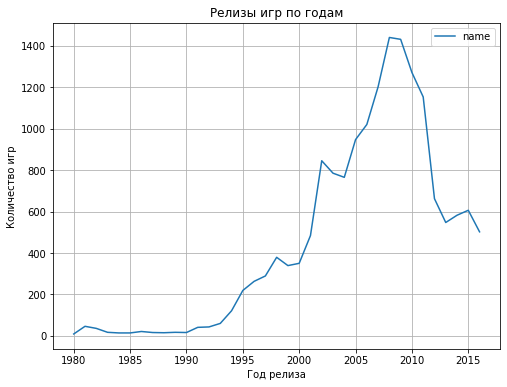

In [27]:
(game_sales_archive
 
      .pivot_table(index='year_of_release', values='name',aggfunc='count')
      .plot(style='-',grid=True, figsize=(8, 6), title='Релизы игр по годам')
)
plt.xlabel('Год релиза')
plt.ylabel('Количество игр')
plt.show()

Вывод: <br>
1. В **80-90** гг. количество выпускаемых игр было **примерно на одном (низком) уровне**. 
2. С **90-х** годов это количество начало **увеличиваться в геометрической прогрессии**. Ранее мы уже указали, что в 1994 году появилась `ESRB` (рейтинговая организация для игр). Видимо с этого периода можно схематично указать **начало информационного и компьютерного бума, развития сферы игр, игровых консолей и пк**.
3. Мы наблюдаем **два спад** в **1999** и **2004** гг. Как в России, так и во всем мире, эти **годы были кризисными**. 
4. **Рост количества игр** продолжился вплоть **до 2008 г**. Это рубеж может быть связан **с развитием мобильных телефонов****, их дисплеев и игровых возможностей.
5. **Спад** наблюдается вплоть **до 2016г**.

### Как менялись продажи по платформам. 
Выделим платформы с наибольшими суммарными продажами и рассмотрим распределение по годам.

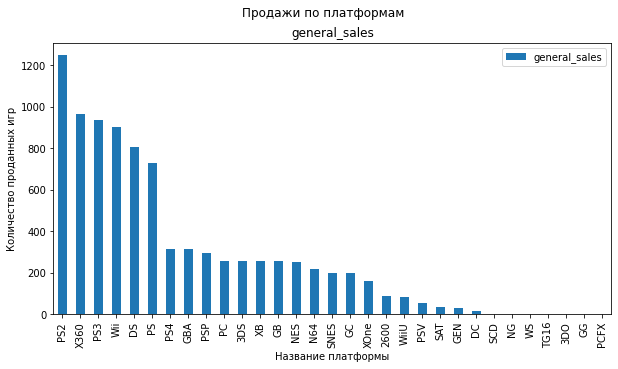

In [28]:
(game_sales_archive
 
      .pivot_table(index='platform', values='general_sales',aggfunc='sum').sort_values(
    by='general_sales', ascending=False)
      .plot(kind='bar',subplots=True, figsize=(10,5), title='Продажи по платформам')
)
plt.xlabel('Название платформы')
plt.ylabel('Количество проданных игр')
plt.show()

Вывод: <br>
Проанализировав диаграмму можно сделать вывод, что **наибольшее количество игр** производилось на платформы: **PS2**, **X360**, **PS3**, **Wii**, **DS** и **PS**.<br>
В разы меньшее количество игр имеют платформы **PS4**, **GBA**, **PSP**, **PC**, **3DS**, **XB** и тд.

### За какой характерный срок появляются новые и исчезают старые платформы.
Создадим список с названиями платформ, чтобы использовать в цикле.

In [29]:
platform_list = game_sales_archive['platform'].unique() 

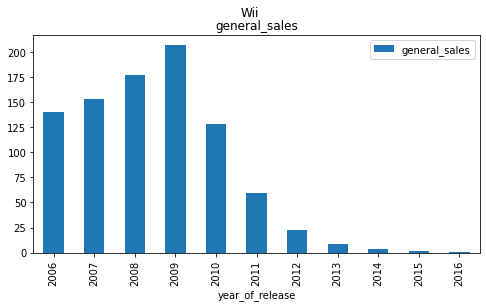

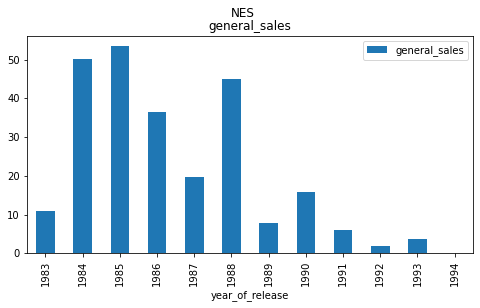

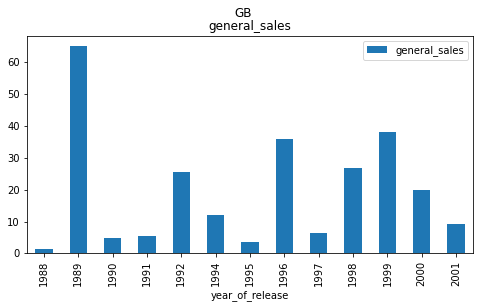

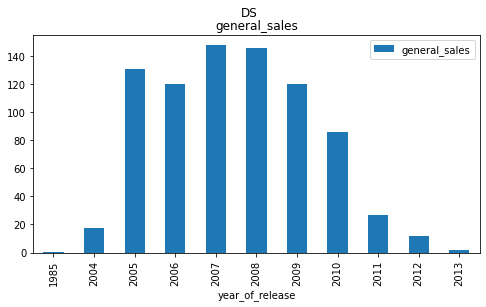

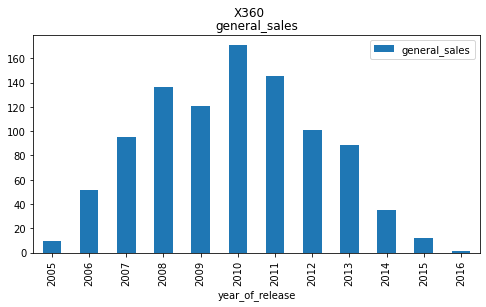

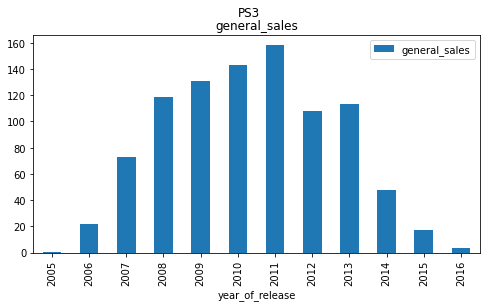

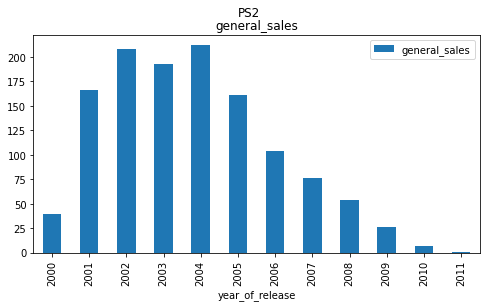

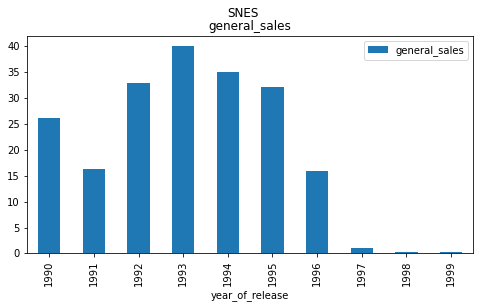

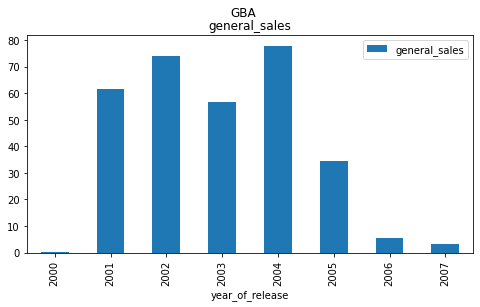

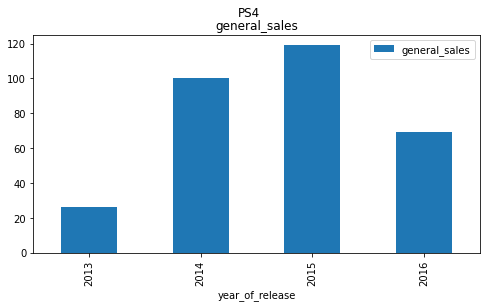

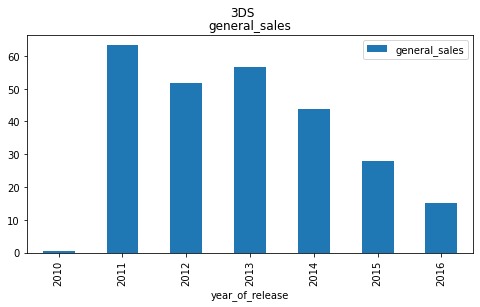

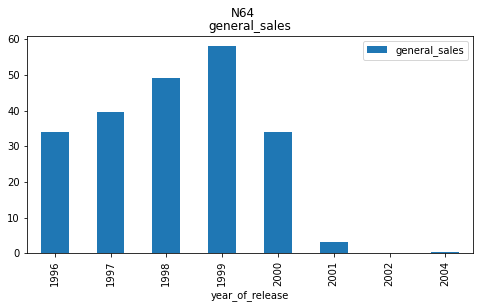

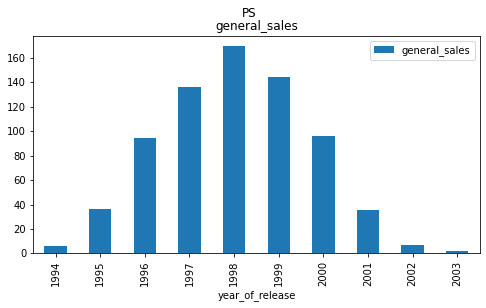

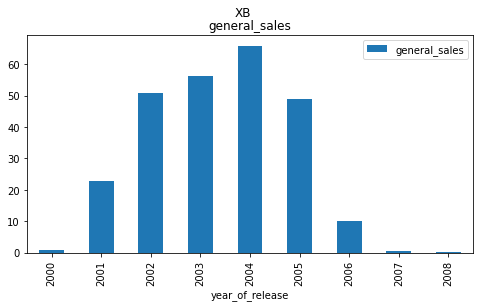

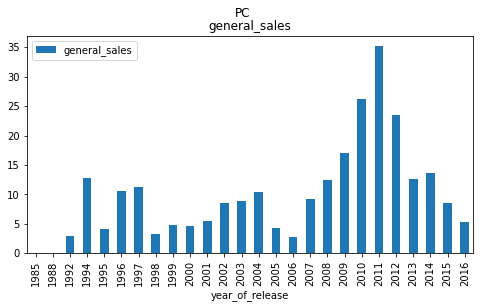

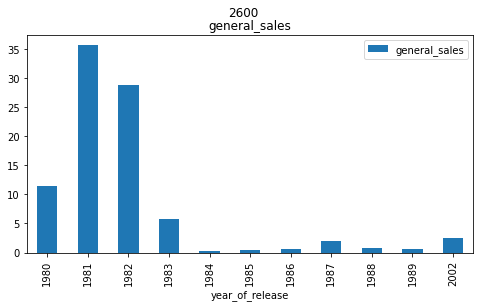

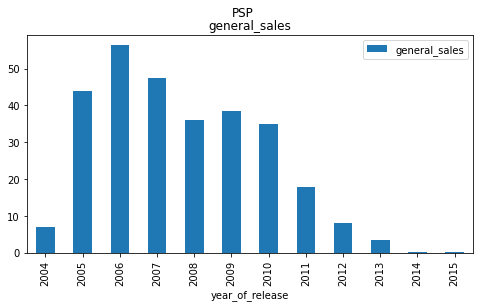

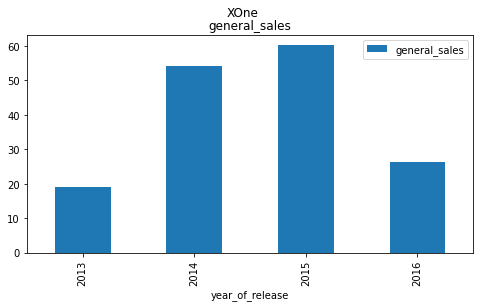

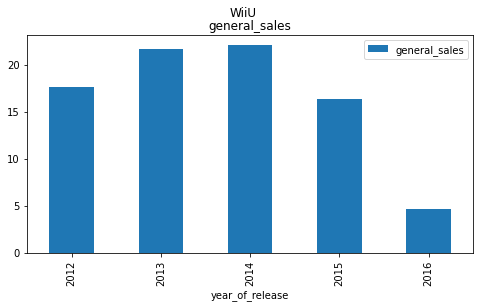

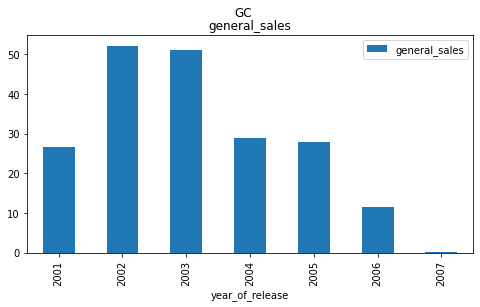

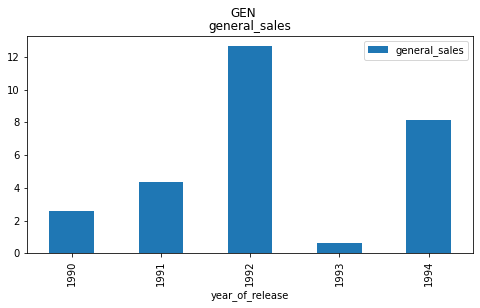

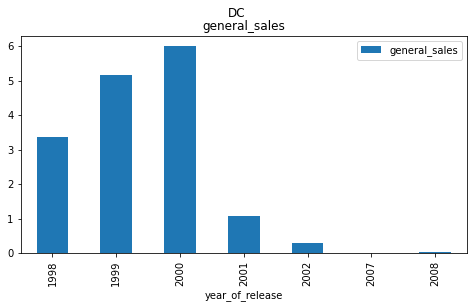

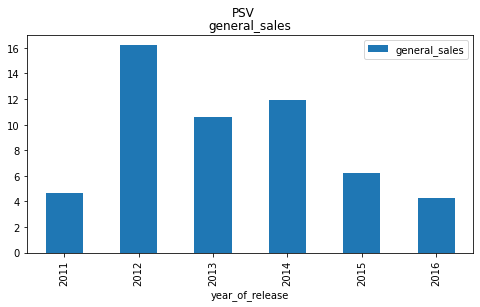

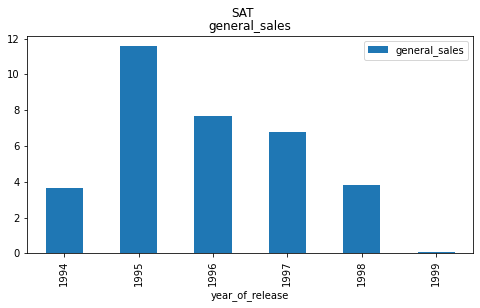

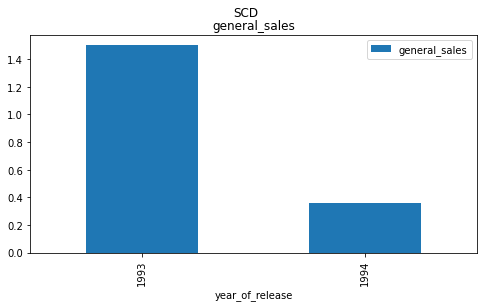

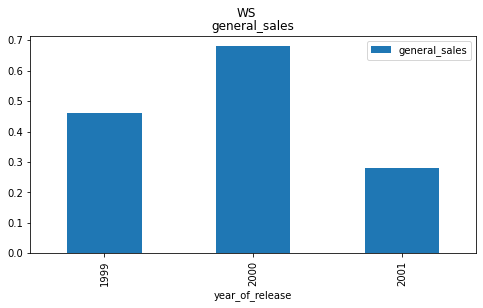

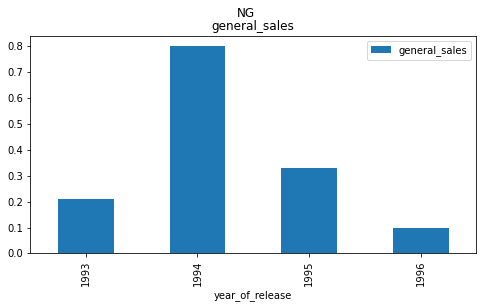

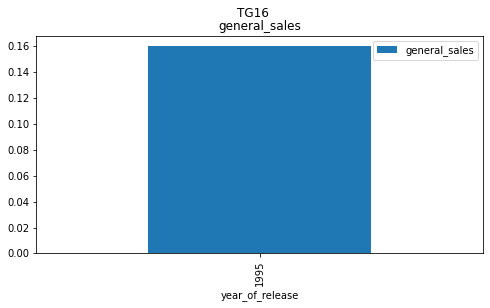

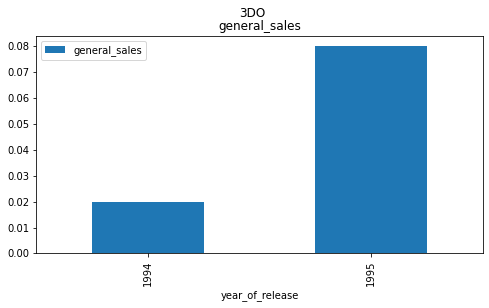

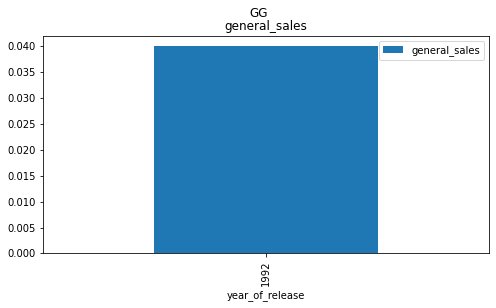

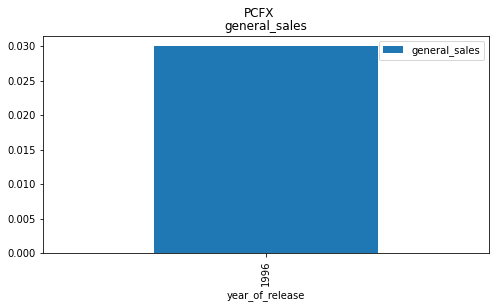

In [30]:
plt.rcParams.update({'figure.max_open_warning': 0}) # чтобы не всплывало предпреждения о большом кол-ве открытых фигур
for platform in platform_list:
    game_sales_archive[game_sales_archive['platform'] == platform]\
    .pivot_table(index='year_of_release', values='general_sales', aggfunc='sum')\
    .plot(kind='bar',subplots=True, figsize=(8,4),title=platform)

Вывод:<br>
Проанализировав диаграммы можно сказать, что `среднее время` "жизни" одной платформы около `9-10 лет`.<br>
Если посмотреть на `обновления платформ`, например ps,ps2,ps3, то в среднем `после выхода новой версии`, старая "живет" около `3-5 лет`.<br>
`Всплеск на новые` платформы приходился на `1995-2000гг` и на `2005-2010гг`.

### Определение актуального периода данных
Для построения более точного прогноза на 2017 год стоит ограничить данные. Т.к. последние новые платформы выпускались в 2013 году и жизнедеятельность новой версии/платформы после обновления составляет в среднем 4 года, то нам подойдет период с 2013 по 2016.

In [31]:
relevant_archive = game_sales_archive[game_sales_archive['year_of_release'] > 2012]
relevant_archive.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


### Потенциально прибыльные платформы
Сгруппируем данные платформ по суммарным продажам. Рассмотрим количество игр, которые были выпущены для каждой платформы, и средние продажи. 

In [32]:
relevant_archive.groupby('platform')['general_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
DS,8.0,0.192500,0.172026,0.03,0.0675,0.150,0.2525,0.51
PC,192.0,0.208646,0.349801,0.01,0.0300,0.080,0.2300,3.05
PS3,345.0,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
PSP,68.0,0.055000,0.063540,0.01,0.0175,0.020,0.0800,0.24
PSV,358.0,0.092151,0.153816,0.01,0.0200,0.040,0.1100,1.96
Wii,23.0,0.593913,0.915432,0.01,0.0450,0.180,0.7550,3.58
WiiU,115.0,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09


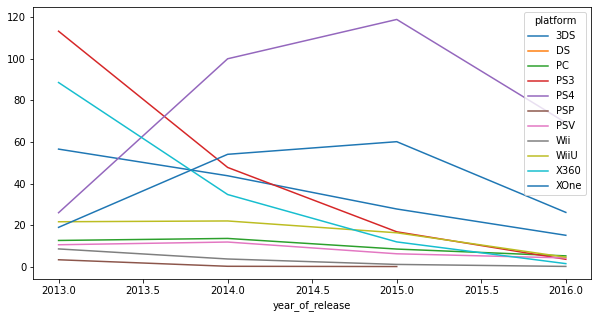

In [33]:
relevant_archive.pivot_table(
    index='year_of_release', columns = 'platform', values='general_sales', aggfunc='sum'
    ).plot(figsize=(10,5));

Вывод:<br>
Из графика по сводной таблице, мы видим, что `продажи на всех платформах идут на спад`. <br>
**PS4** и **Xone** - являются **потенциально прибыльными**. Они `появились относительно недавно`, с учетом этого в среднем платформы будут `актуальны ещё около 5 лет`. Обратим внимание также на то, что продажи падают с 2016 года. До этого времени они постоянно росли.<br> За 2016 данные не полные, поэтому `сложно сказать есть ли спад` на самом деле и насколько он резкий.<br>
В период `до 2014 г.` большой `популярностью` пользовались платформы **X360** и **PS3**. Но **спрос упал даже на них**, не говоря о всех остальных платформах, кроме лидеров.<br>

### Построим диаграмму распределения продаж для каждой платформы.

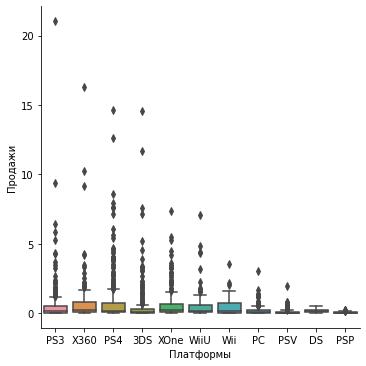

In [34]:
sns.catplot(data=relevant_archive, x='platform', y='general_sales', kind='box')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.show()


Данные получились слишком "сплющены". Поставим ограничения по `y`, для этого присвоим "ящик с усами" переменной **box_archive**. 

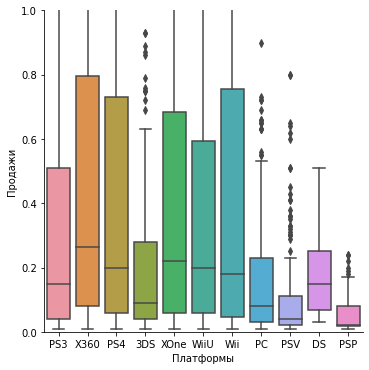

In [35]:
box_archive = sns.catplot(data=relevant_archive, x='platform', y='general_sales', kind='box',)
box_archive.set(ylim=(0, 1))
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.show()

Вывод: <br>
`Медиана` по продажам `у всех` платформ `на разном уровне`. Медиана **X360** выше остальных, но как мы подметили выше, её популярность вероятнее всего скоро угаснет. Затем следуют такие платформы как **XOne**, **WiiU**, **PS4** и **Wii**. <br>
На графике с суммарными продажами платформы **XOne** и **WiiU** не вошли в список лидеров по общим продажам. Это скорее всего связано с тем, что они были выпущены в 2012-2013 годах. <br>
**PS4**, выделенная нами как потенциально прибыльная платформа, чуть `отстает от` потенциально прибыльного `конкурента` **XOne** `по медиане`.

### Влияние отзывов на популярность платформ.
Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами для наиболее популярных платформ.

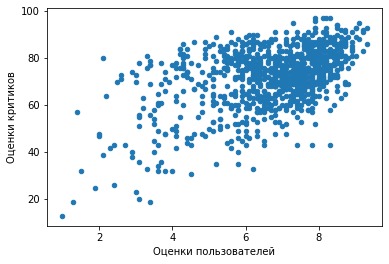

In [36]:
relevant_archive.plot(kind='scatter', x='user_score', y='critic_score');
plt.xlabel('Оценки пользователей')
plt.ylabel('Оценки критиков')
plt.show()

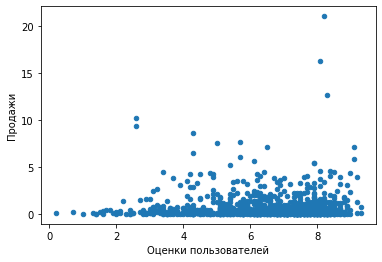

In [37]:
relevant_archive.plot(kind='scatter', x='user_score', y='general_sales');
plt.xlabel('Оценки пользователей')
plt.ylabel('Продажи')
plt.show()

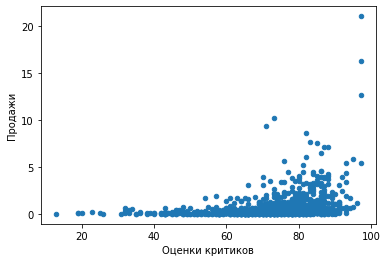

In [38]:
relevant_archive.plot(kind='scatter', x='critic_score', y='general_sales');
plt.xlabel('Оценки критиков')
plt.ylabel('Продажи')
plt.show()

По диаграммам рассеивания видно, что `связь продаж` с `оценками` `критиков` или `пользователей` очень **слабая** или же вообще отсутствуют.<br>
`Оценки пользователей и критиков` имеют **линейную положительную зависимость**. <br>
Теперь построим цикл, который покажет `коэффициент корреляции Пирсона` для каждой отдельной платформы.

In [39]:
for platform, colomn in relevant_archive.groupby('platform'):
    print('Платформа ', platform)
    print('Корреляция пользовательских оценок и продаж =',colomn['general_sales'].corr(colomn['user_score']))
    print('Корреляция оценок критиков и продаж =', colomn['general_sales'].corr(colomn['critic_score']))

Платформа  3DS
Корреляция пользовательских оценок и продаж = 0.24150411773563016
Корреляция оценок критиков и продаж = 0.35705661422881035
Платформа  DS
Корреляция пользовательских оценок и продаж = nan
Корреляция оценок критиков и продаж = nan
Платформа  PC
Корреляция пользовательских оценок и продаж = -0.08999775678448749
Корреляция оценок критиков и продаж = 0.1996598483638018
Платформа  PS3
Корреляция пользовательских оценок и продаж = 0.0023944027357566925
Корреляция оценок критиков и продаж = 0.3342853393371919
Платформа  PS4
Корреляция пользовательских оценок и продаж = -0.031957110204556376
Корреляция оценок критиков и продаж = 0.406567902061781
Платформа  PSP
Корреляция пользовательских оценок и продаж = -0.9999999999999999
Корреляция оценок критиков и продаж = nan
Платформа  PSV
Корреляция пользовательских оценок и продаж = 0.0009424723319108626
Корреляция оценок критиков и продаж = 0.25474235030686565
Платформа  Wii
Корреляция пользовательских оценок и продаж = 0.68294172153

Построим диаграммы рассеивания для наглядности по пяти платформам (`top5_platform`)

In [40]:
list_top5_platform = ["3DS", "PS3", "PS4", "WiiU", "XOne"]

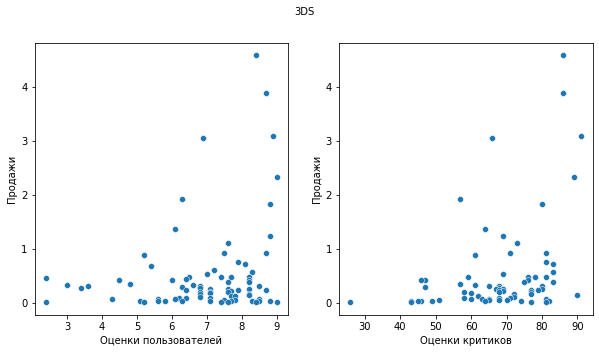

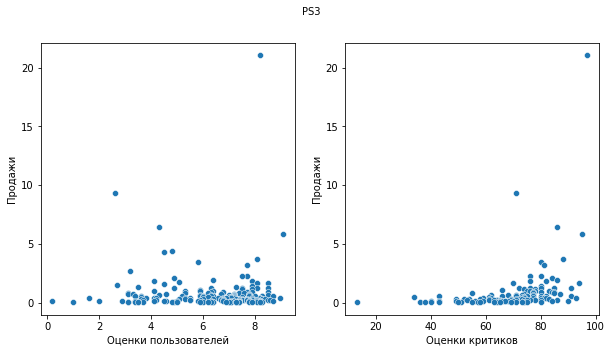

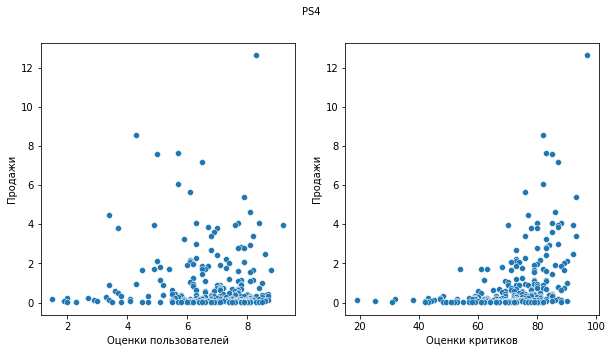

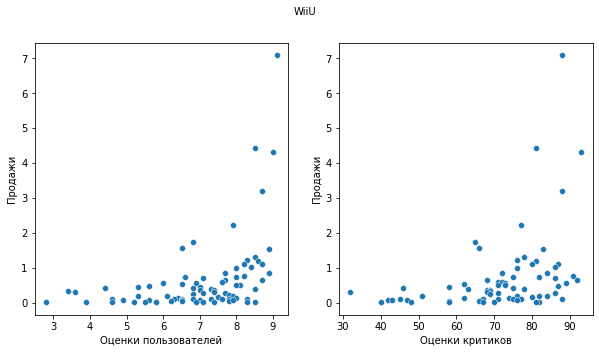

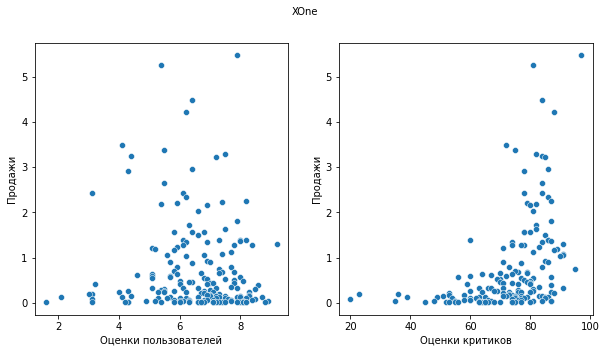

In [41]:
def top5_platform_plt(name_of_platform):
    platform = relevant_archive[relevant_archive['platform']==name_of_platform]
    fig, ax = plt.subplots(1 ,2, figsize=(10,5))
    sns.scatterplot(x='user_score', y='general_sales', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='general_sales', data=platform, ax=ax[1])
    fig.suptitle(name_of_platform, fontsize=10)
    ax[0].set(xlabel='Оценки пользователей')
    ax[1].set(xlabel='Оценки критиков')
    ax[0].set(ylabel='Продажи')
    ax[1].set(ylabel='Продажи')
    plt.show()

for platform in list_top5_platform:
    top5_platform_plt(platform)

Вывод: <br>
Корреляция по платформам **PS3**,**PS4** и **XOne** `положительная` только `к оценкам критиков`, примерно 0.4. У других платформ зависимости от оценок ещё слабее. <br>
У некоторых мы наблюдаем значения `nan`, так как `остались пропуски` в столбцах оценок.<br>
**Пользовательские оценки** почти **никто не учитывает**, `кроме платформ` **Wii** и **WiiU**. Зависимости от оценок пользователей здесь очень сильная.<br>
Если покупатели и ориентируются на оценки, то это оценки критиков. В уникальном случае у платформ **Wii** и **WiiU** оценки пользователей важнее для потенциальных клиентов.

### Распределение по жанрам
Рассмотрим общее распределение игр по жанрам. Создадим сводную таблицу по столбцам `genre` и `general_sales` и сохраним в новую переменную **genre_archive**.

In [42]:
genre_archive = relevant_archive.pivot_table(index='genre', values='general_sales',aggfunc='sum').sort_values(
    by='general_sales', ascending=False).reset_index()
genre_archive

,genre,general_sales
0,Action,322.50
1,Shooter,232.98
2,Sports,150.65
3,Role-Playing,145.89
4,Misc,63.06
5,Platform,42.63
6,Racing,39.89
7,Fighting,35.31
8,Adventure,23.64
9,Simulation,21.76


Определим самые **прибыльные** жанры, а также выделим жанры **с низкими продажами**.

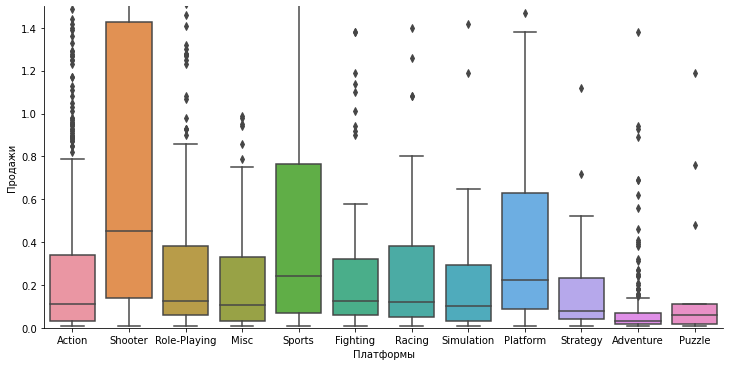

In [43]:
box_archive = sns.catplot(data=relevant_archive, x='genre', y='general_sales',kind='box', height=5, aspect=2)
box_archive.set(ylim=(0, 1.5))
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.show()

Вывод: <br>
Медианные продажи `Shooter` самые высокие. Следом идут медианы `Sports` и `Platform`. **Производство** таких игр намного **дороже** и **сложнее**, чем в **отстающих** жанрах `adventure` и `puzzle`. Поэтому на выходе сами игры стоят дороже. Однако стоит обратить внимание, что игры в стиле шутер - скорее всего имеют ограниченный круг пользователей из-за возрастного ограничения.

# 4. Составление портрета пользователя каждого региона.

`Для каждого региона` (NA, EU, JP) выделим **топ-5 самых популярных платформ** и их долю на рынке.

In [44]:
na_sales_archive = relevant_archive.pivot_table(index='platform', values='na_sales',aggfunc='sum')\
    .sort_values(by='na_sales', ascending=False).reset_index()
na_sales_archive['percent'] = (na_sales_archive['na_sales'] / na_sales_archive['na_sales'].sum()) * 100
na_sales_archive

,platform,na_sales,percent
0,PS4,108.74,24.838393
1,XOne,93.12,21.270472
2,X360,81.66,18.652779
3,PS3,63.50,14.504671
4,3DS,38.20,8.725645
5,WiiU,29.21,6.672149
6,PC,11.19,2.556020
7,Wii,6.56,1.498435
8,PSV,5.04,1.151237
9,DS,0.57,0.130199


In [45]:
eu_sales_archive = relevant_archive.pivot_table(index='platform', values='eu_sales',aggfunc='sum')\
    .sort_values(by='eu_sales', ascending=False).reset_index()
eu_sales_archive['percent'] = (eu_sales_archive['eu_sales'] / eu_sales_archive['eu_sales'].sum()) * 100
eu_sales_archive

,platform,eu_sales,percent
0,PS4,141.09,35.927275
1,PS3,67.81,17.267195
2,XOne,51.59,13.136920
3,X360,42.52,10.827328
4,3DS,30.96,7.883680
5,PC,25.84,6.579919
6,WiiU,19.85,5.054620
7,PSV,6.10,1.553309
8,Wii,5.93,1.510020
9,DS,0.85,0.216445


In [46]:
jp_sales_archive = relevant_archive.pivot_table(index='platform', values='jp_sales',aggfunc='sum')\
    .sort_values(by='jp_sales', ascending=False).reset_index()
jp_sales_archive['percent'] = (jp_sales_archive['jp_sales'] / jp_sales_archive['jp_sales'].sum()) * 100
jp_sales_archive

,platform,jp_sales,percent
0,3DS,67.81,48.085378
1,PS3,23.35,16.557935
2,PSV,18.59,13.182527
3,PS4,15.96,11.317544
4,WiiU,10.88,7.715218
5,PSP,3.53,2.503191
6,X360,0.51,0.361651
7,XOne,0.34,0.241101
8,Wii,0.05,0.035456
9,DS,0.00,0.000000


Для наглядности создадим круговые диаграммы по каждой платформе по регионам. Выделим ТОП5 популярных, остальные суммируем в `other`.

In [ ]:
# второй вариант кода для круговой диаграммы
actual_archive = relevant_archive.copy()
regions = actual_archive.columns[4:7]
# начертим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 3,figsize=(12, 4))
fig.suptitle('ТОП-5 платформ в регионах')
for region_name in range(3):
  # выберем 5 самых продающих жанров
  df_region_name = (actual_archive.groupby('genre')[regions[region_name]].sum().
             reset_index().
             sort_values(regions[region_name], ascending = False, ignore_index = True).
             head(5))
  # занесем все остальыне продажи в другие жанры
  df_i = df_region_name.append({'genre': 'Other_genre', regions[region_name]: actual_archive[regions[region_name]].sum() - df_region_name[regions[region_name]].sum()}, ignore_index= True)
  axs[region_name].pie(df_region_name[regions[iregion_name]], labels = df_region_name['genre'], autopct='%1.1f%%')
  # Зададим название региона.
  axs[region_name].set_title(df_region_name.columns[1].split('_')[0].upper())
plt.show()

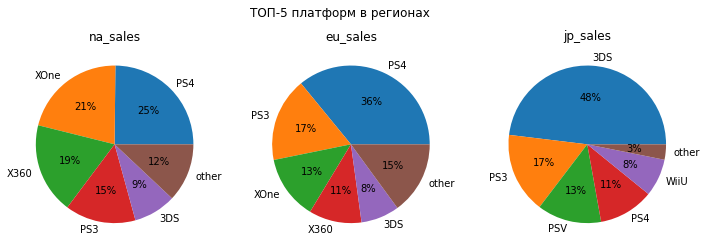

In [47]:
regions = relevant_archive.columns[4:7]
fig, axs = plt.subplots(1, 3,figsize=(12, 4))
fig.suptitle('ТОП-5 платформ в регионах')
for region_name in range(3):
  a_archive = (relevant_archive.groupby('platform')[regions[region_name]].sum().
             reset_index().
             sort_values(regions[region_name], ascending = False, ignore_index = True).
             head(5))
  a_archive = a_archive.append({'platform': 'other', regions[region_name]: \
  relevant_archive[regions[region_name]].sum() - a_archive[regions[region_name]].sum()}, ignore_index= True)

  axs[region_name].pie(a_archive[regions[region_name]], labels = a_archive['platform'], autopct='%.0f%%')
  axs[region_name].set_title(a_archive.columns[1])

plt.show();

88% рынка занимают первые ТОП-5 платформ `в Северной Америке`. Лидируют выделенные нами потенциально прибыльные **PS4**(25%) и **XOne**(19%). <br>
`В Европе` первые ТОП-5 платформ - 85% рынка. С большим отрывом лидирует **PS4**(36%), затем идет **PS3**(17%), и **XOne**(13%).<br>
`В Японии` ТОП-5 заняли почти всю площадку - 97% от всех. Явным любимцем является платформа **3DS**(48%), **PS3**, **PSV** и **PS4** занимают в сумме 41%. Платформа **XOne** в японский ТОП-5 не вошла вовсе.

Теперь выделим ТОП-5 популярных жанров по регионам.

In [48]:
na_sales_archive = relevant_archive.pivot_table(index='genre', values='na_sales',aggfunc='sum')\
    .sort_values(by='na_sales', ascending=False).reset_index()
na_sales_archive['percent'] = (na_sales_archive['na_sales'] / na_sales_archive['na_sales'].sum()) * 100
na_sales_archive

,genre,na_sales,percent
0,Action,126.13,28.810617
1,Shooter,109.74,25.066813
2,Sports,65.27,14.908975
3,Role-Playing,46.40,10.598689
4,Misc,27.49,6.279266
5,Platform,18.14,4.143539
6,Fighting,15.55,3.551931
7,Racing,12.96,2.960323
8,Adventure,7.14,1.630919
9,Simulation,4.86,1.110121


In [49]:
eu_sales_archive = relevant_archive.pivot_table(index='genre', values='eu_sales',aggfunc='sum')\
    .sort_values(by='eu_sales', ascending=False).reset_index()
eu_sales_archive['percent'] = (eu_sales_archive['eu_sales'] / eu_sales_archive['eu_sales'].sum()) * 100
eu_sales_archive

,genre,eu_sales,percent
0,Action,118.61,30.202949
1,Shooter,87.86,22.372743
2,Sports,60.52,15.410863
3,Role-Playing,36.97,9.414071
4,Racing,20.19,5.141198
5,Misc,20.04,5.103002
6,Platform,15.58,3.967304
7,Simulation,10.92,2.780678
8,Fighting,8.55,2.177179
9,Adventure,8.25,2.100787


In [50]:
jp_sales_archive = relevant_archive.pivot_table(index='genre', values='jp_sales',aggfunc='sum')\
    .sort_values(by='jp_sales', ascending=False).reset_index()
jp_sales_archive['percent'] = (jp_sales_archive['jp_sales'] / jp_sales_archive['jp_sales'].sum()) * 100
jp_sales_archive

,genre,jp_sales,percent
0,Role-Playing,51.04,36.193448
1,Action,40.49,28.712239
2,Misc,9.44,6.694086
3,Fighting,7.65,5.424762
4,Shooter,6.61,4.687278
5,Adventure,5.82,4.127074
6,Sports,5.41,3.836335
7,Platform,4.79,3.396681
8,Simulation,4.52,3.205219
9,Racing,2.30,1.630974


Для наглядности создадим круговые диаграммы по каждому жанру по регионам. Выделим ТОП5 популярных, остальные суммируем в `other`.

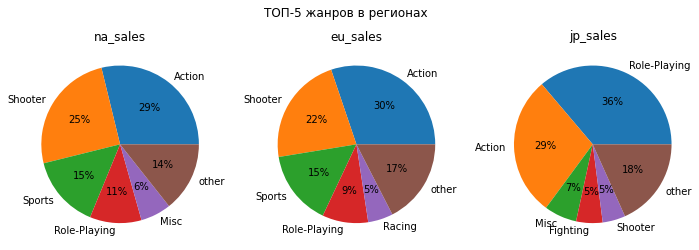

In [51]:
regions = relevant_archive.columns[4:7]
fig, axs = plt.subplots(1, 3,figsize=(12, 4))
fig.suptitle('ТОП-5 жанров в регионах')
for region_name in range(3):
  a_archive = (relevant_archive.groupby('genre')[regions[region_name]].sum().
             reset_index().
             sort_values(regions[region_name], ascending = False, ignore_index = True).
             head(5))
  a_archive = a_archive.append({'genre': 'other', regions[region_name]: \
  relevant_archive[regions[region_name]].sum() - a_archive[regions[region_name]].sum()}, ignore_index= True)

  axs[region_name].pie(a_archive[regions[region_name]], labels = a_archive['genre'], autopct='%.0f%%')
  axs[region_name].set_title(a_archive.columns[1])

plt.show();

`В Северной Америке` самые популярные жанры это **Action** (29%) и **Shooter** (25%).ТОП5 составляет 86% от всех. <br>
`В Европе` лидеры те же , что в Америке. Диаграммы почти идентичны.ТОП5 составляет 83% от всех. <br>
`В Японии` же наоборот самый популярный жанр **Role-Playing** (36%). Возможно это связанно с тем, что самая популярная платформа 3DS - портативная, и удобно играть именно в дороге. Второе место ТОП-5 Японии занимает жанр **Action** (29%), а вот жанр **Shooter**не пользуется популятностью - менее 5%.ТОП5 составляет 82% от всех.

Рассмотрим влияние рейтинга ESRB на продажи по регионам.

In [52]:
na_sales_archive = relevant_archive.pivot_table(index='rating', values='na_sales')\
    .sort_values(by='na_sales', ascending=False).reset_index()
na_sales_archive['percent'] = (na_sales_archive['na_sales'] / na_sales_archive['na_sales'].sum()) * 100
na_sales_archive

,rating,na_sales,percent
0,M,0.444328,38.229257
1,E,0.261755,22.520973
2,E10+,0.215238,18.518737
3,T,0.149520,12.864417
4,unknown,0.091431,7.866617


In [53]:
eu_sales_archive = relevant_archive.pivot_table(index='rating', values='eu_sales')\
    .sort_values(by='eu_sales', ascending=False).reset_index()
eu_sales_archive['percent'] = (eu_sales_archive['eu_sales'] / eu_sales_archive['eu_sales'].sum()) * 100
eu_sales_archive

,rating,eu_sales,percent
0,M,0.391935,37.540714
1,E,0.276026,26.438615
2,E10+,0.169405,16.226078
3,T,0.125976,12.066343
4,unknown,0.080685,7.728249


In [54]:
jp_sales_archive = relevant_archive.pivot_table(index='rating', values='jp_sales')\
    .sort_values(by='jp_sales', ascending=False).reset_index()
jp_sales_archive['percent'] = (jp_sales_archive['jp_sales'] / jp_sales_archive['jp_sales'].sum()) * 100
jp_sales_archive

,rating,jp_sales,percent
0,unknown,0.087209,33.480471
1,T,0.061832,23.738015
2,E,0.050132,19.246476
3,M,0.037930,14.561844
4,E10+,0.023373,8.973194


Если сравнить таблицы `Северной Америки` и `Европы` - то их `вкусы идентичны` почти до процента. Самый `популярный рейтинг` **М** (38%) **для взрослых** (куда скорее всего и относятся жанры `Action` и `Shooter`), затем рейтинг **E** (25-26%) - **для всех** (большая пользовательская аудитория, ничем не ограничена).<br>
`В Японии` же целых 33% от продаж занимают игры без рейтинга. В то время как этот рейтинг составляет около 7-8% в Америке и Европе. На втором месте рейтинг **T** - **для подростков** (23%) и на третьем **E** (19%) - **для всех**. Вероятнее всего, игры на различные платформы более популярны среди подростков.

Вывод: <br>
**Портрет пользователя из Северной Америки:**<br>
Играет на платформах **PS4** и **XOne** в жанре **Action**/**Shooter** с рейтингом **М** или **E**<br><br>
**Портрет пользователя из Европы:**<br>
Выбирает те же платформы, что и американец + платформа **PS3** , любимые жанры так же **Action**/**Shooter** с индентичными рейтингами (**М** или **E**)<br><br>
**Портрет пользователя из Японии:**<br>
В почти 50% случаем японец предпочитает портативную платформу **3DS**. Реже - платформы серии **PlayStation**. Любимые жанры **Role-Playing** и **Action** с рейтингом **T** и **E**. Платформа **XOne** и жанр **Shooter** популятностью не пользуются.

# 5. Проверка сформированных гипотез.

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; <br>
**Нулевая гипотеза** (H0): Средние пользовательские рейтинги платформ Xbox One и PC **одинаковые**.<br>
**Альтернативная гипотеза** (H1): Средние пользовательские рейтинги платформ Xbox One и PC **разные**.<br>

In [55]:
xone_platform = relevant_archive[(relevant_archive['platform'] == 'XOne') & (relevant_archive['user_score'].notnull())]['user_score']
pc_platform = relevant_archive[(relevant_archive['platform'] == 'PC') & (relevant_archive['user_score'].notnull())]['user_score']
print('Средний пользовательский рейтинг платформы Xbox One:', xone_platform.mean())
print('Средний пользовательский рейтинг платформы PC', pc_platform.mean())

Средний пользовательский рейтинг платформы Xbox One: 6.521428571428572
Средний пользовательский рейтинг платформы PC 6.280379746835442


Посчитаем, отличаются ли дисперсии выборок.

In [56]:
print(np.var(xone_platform))
print(np.var(pc_platform))


1.8965188383045526
2.9913239064252526


Теперь проверим **нулевую гипотезу**. <br>
Пороговое значение alpha выберем **.05**. <br>
Дисперсии выборок довольно сильно отличаются, поэтому укажем параметр `equal_var` = False.

In [57]:
alpha = .05

results = st.ttest_ind(xone_platform, pc_platform, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.16174359801784316
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза не может быть отвергнута.

2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. <br>
**Нулевая гипотеза** (H0): Средние пользовательские рейтинги жанров **Action** и **Sports** **одинаковые**.<br>
**Альтернативная гипотеза** (H1): Средние пользовательские рейтинги жанров **Action** и **Sports** **разные**.<br>

In [58]:
action_genre = relevant_archive[(relevant_archive['genre'] == 'Action') & (relevant_archive['user_score'].notnull())]['user_score']
sports_genre = relevant_archive[(relevant_archive['genre'] == 'Sports') & (relevant_archive['user_score'].notnull())]['user_score']
print('Средний пользовательский рейтинг жанра Action:', action_genre.mean())
print('Средний пользовательский рейтинг жанра Sports', sports_genre.mean())

Средний пользовательский рейтинг жанра Action: 6.8375
Средний пользовательский рейтинг жанра Sports 5.238124999999999


Посчитаем, отличаются ли дисперсии выборок.

In [59]:
print(np.var(action_genre))
print(np.var(sports_genre))

1.761935586734694
3.160733984375


Теперь проверим **нулевую гипотезу**. <br>
Пороговое значение alpha выберем **.05**. <br>
Дисперсии выборок довольно сильно отличаются, поэтому укажем параметр `equal_var` = False.

In [60]:
alpha = .05

results = st.ttest_ind(action_genre, sports_genre, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.3883444596405356e-20
Отвергаем нулевую гипотезу


Вывод:<br>
**Нулевая гипотеза** (H0): Средние пользовательские рейтинги платформ Xbox One и PC **одинаковые**. `Не получилось отвергнуть нулевую гипотезу`<br>
**Нулевая гипотеза** (H0): Средние пользовательские рейтинги жанров **Action** и **Sports** **одинаковые**. На имеющихся данных, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов жанров Action и Sports в пользу альтернативной гипотезы<br>
То есть вероятнее всего средние пользовательские рейтинги платформ Xbox One и PC **одинаковые**, а средние пользовательские рейтинги жанров **Action** и **Sports** **разные**.

# Общий вывод и рекомендации.

Перед началом исследовательского анализа мы:
- Привели `названия столбцов к читаемому виду`.<br>
- Исправили `тип данных на целочисленный` в столбцах `год релиза игры` и `оценки пользователей`.<br> 
- `Удалили менее 1%`данных из архива. <br>
- Большая часть пропусков `осталась без изменений`, т.к. оценки пользователей и критиков не могли быть проставлены. До 00-х многие просто не имели возможности для высталения оценки и опубликования ее в сети интернет.<br>
- Что касается рейтинга - то его проставление зависело от даты основания организации. Пропуски в этой колонке заменили на значение `unknown` <br>
- Создали столбец `general_sales` и сохранили в него суммарные продажи для каждой игры.<br><br>
Проведя исследовательский анализ мы выяснили:
- Игры начали **активно выпускаться на платформы** с начала **1990** годов. До этого объемы были маленькие, как и количество существующих платформ. На рынок реализации игр, на наш взгляд, могли повлиять глобальные кризисы в политических и финансовых сферах 1999-2004гг. Мы наблюдали несколько точек спада выпускаемых игр в этот период. Кроме того развитие мобильных телефонов, игр для них и улучшение дисплеев и "начинки" привело к спаду примерно с 2008 по 2016гг.<br>
- **Большая часть** игр производилась на платформы **серии PS, X360, Wii и DS**. В среднем продолжительность актуального спроса на платформу и производство игр на нее граничит в периоде 9-10 лет. Тогда как **жизнедеятельность старой версии** платформы(прим., **PS2 и PS3**) `не превышает 3-5 лет` с момента выпуска новой версии.<br>
- Актуальные данные определили в диапазоне 2013-2016гг., т.к. в среднем платформа остается востребована около 4 лет. <br>
- Потенциально прибыльными платформами мы выделили **PS4** и **Xone**(появились в 2013 году). Плоть до 2015г. продажи по ним росли. 2016 год не берем в учет, т.к. данные  за этот год не полные.<br>
- `Медиана` по продажам `у всех` платформ `на разном уровне`. Медиана **X360** выше остальных, но как мы подметили выше, её популярность вероятнее всего скоро угаснет. Затем следуют такие платформы как **XOne**, **WiiU**, **PS4** и **Wii**. <br>
- **PS4**, выделенная нами как потенциально прибыльная платформа, чуть `отстает от` потенциально прибыльного `конкурента` **XOne** `по медиане`.<br>
- Если покупатели и ориентируются на оценки игр, то это оценки критиков. В уникальном случае у платформ **Wii** и **WiiU** оценки пользователей важнее для потенциальных клиентов.<br>
- Медианные продажи жанра`Shooter` самые высокие. <br><br>
`Портрет пользователя из Северной Америки`: <br>
Играет на платформах **PS4** и **XOne** в жанре **Action**/**Shooter** с рейтингом **М** или **E**<br><br>
`Портрет пользователя из Европы`:<br>
Выбирает те же платформы, что и американец + платформа **PS3** , любимые жанры так же **Action**/**Shooter** с индентичными рейтингами **М** или **E**<br><br>
`Портрет пользователя из Японии`:<br>
Почти в 50% случаев японец предпочитает портативную платформу **3DS**. Реже - платформы серии **PlayStation**. Любимые жанры **Role-Playing** и **Action** с рейтингом **T** и **E**. Платформа **XOne** и жанр **Shooter** популярностью не пользуются.<br><br>

Гипотеза `средние пользовательские рейтинги платформ Xbox One и PC **одинаковые**` не может быть отвергнута.<br>
Гипотеза `средние пользовательские рейтинги жанров **Action** и **Sports** **одинаковые**` отвергается .<br>

Исследование показало, что если компания ориентируется на рынок Северной Америки и Европы, то большим спросом будут пользоваться платформы **PS4**/**XOne** в жанре **Action**/**Shooter**. Рейтинг **М** или же **Е**. Зависимости от пользовательских оценок не наблюдается, слабый, но хоть какой-то вес имеют оценки критиков. Чем выше оценки - тем больше продажи.<br>
Если ориентироваться на рынок Японии, то лучше сделать упор в жанр **Role-Playing** рейтинга **Т**/**Е** на платформе **3DS**, которой можно пользоваться вне дома/офиса.<br> Оценки пользователей и критиков на низком уровне влияния на продажи.